In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
sys.path.append('custom_modules')
import Data_processing as dp
import Data_visualization as dv

In [2]:
def get_df(path):
    df = pd.read_excel(path)
    df.rename(columns = {'Unnamed: 0' : 'Time Moment'}, inplace = True)
    df = df.drop(labels = [0], axis = 0) # удалить вторую строку оглавления
    df=df.dropna()
    return df

In [3]:
path_to_data='E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2011.xlsx'

In [4]:
def nan_count(path):
    df = pd.read_excel(path)
    df.rename(columns = {'Unnamed: 0' : 'Time Moment'}, inplace = True)
    df = df.drop(labels = [0], axis = 0) # удалить вторую строку оглавления
    k=max(df.isna().sum())
    return k

In [5]:
def normal_look(df, path):
    p=nan_count(path)
    df=dp.normalize_data(df)
    return df

In [6]:
# вывести 4 графика зависимости значений столбца относительно времени (по графику на столбец)
def draw_4_graphs(df, a:list):
    plt.figure(figsize=(22, 20))
    i = 1
    k=0
    columns = list(df.columns[1:])
    
    for col in columns:
        plt.subplot(4, 1, i)
        plt.plot(df['Time Moment'] , df[col], '-', label='График до применения фильтра')
        plt.plot(df['Time Moment'] , a[k], '-', label='График после применения фильтра')
        plt.xlabel('Time Moment')
        plt.ylabel(col)
        plt.title(col)
        plt.legend()
        i+=1
        k+=1
        
    plt.show()

In [7]:
def easy_mean(f, s_k, max_k, d):
    # Creating static variable
    if not hasattr(easy_mean, "fit"):
        easy_mean.fit = f
    # Adaptive ratio
    k = s_k if (abs(f - easy_mean.fit) < d) else max_k

    # Calculation easy mean
    easy_mean.fit += (f - easy_mean.fit) * k
    return easy_mean.fit

In [8]:
def normalise(func):
    o = []
    for p in func:
        res = easy_mean(p, 0.1, 0.9, 1.5)
        o.append(res)
    return o

In [9]:
def filtr(df):
    a=[]
    columns = list(df.columns[1:])
    for col in columns:
        a.append(normalise(df[col]))
        delattr(easy_mean, "fit")
    return a
            

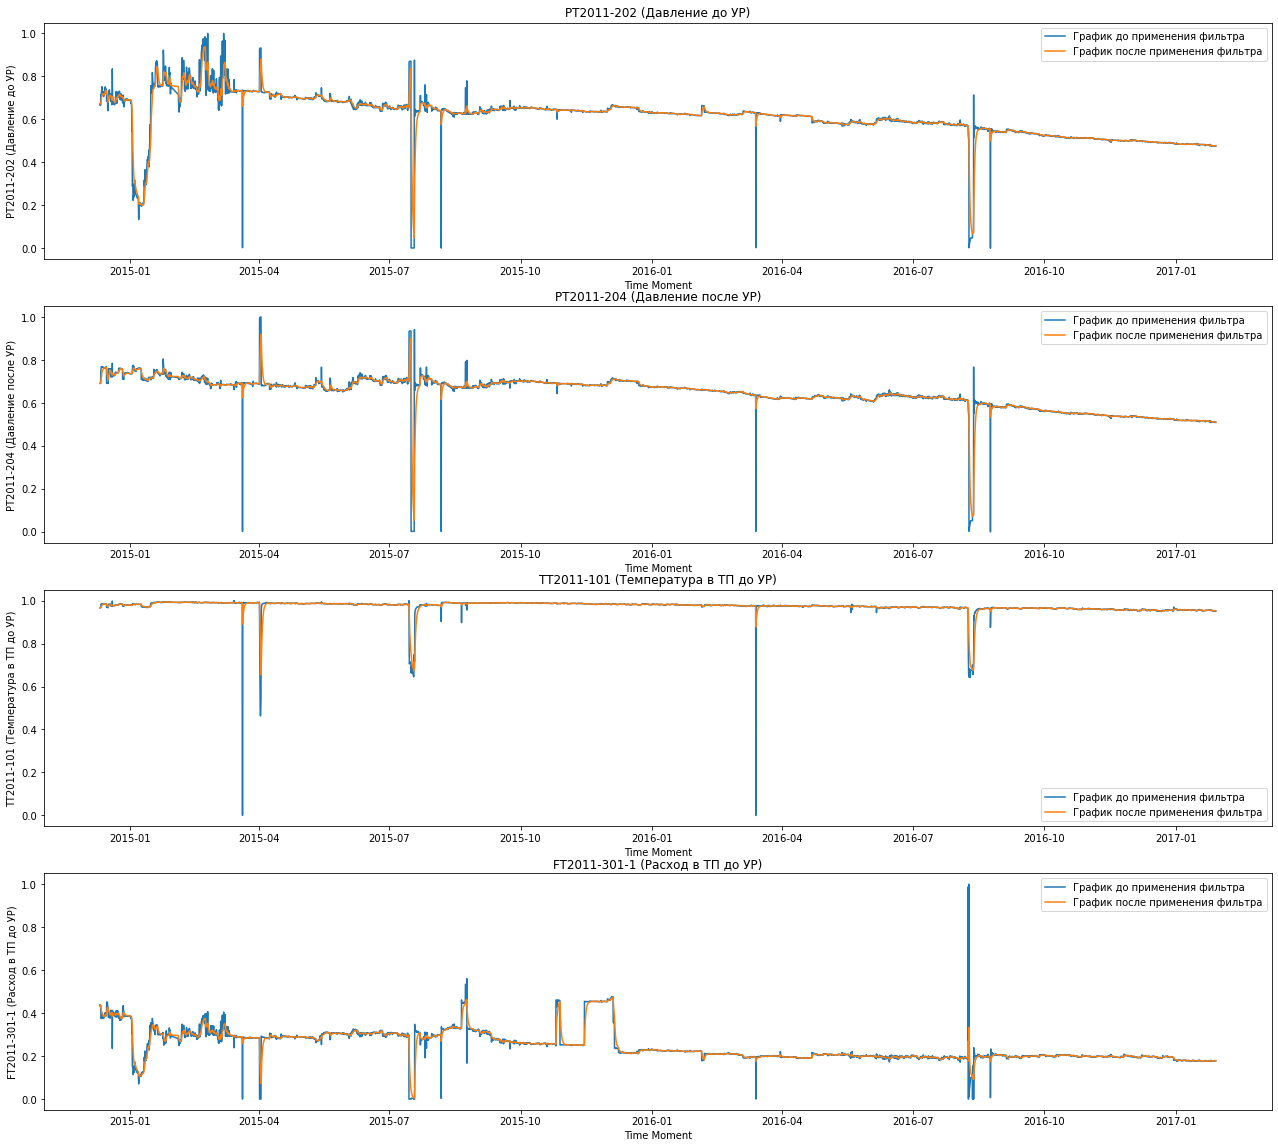

In [10]:
df=get_df('E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2011.xlsx')
df=normal_look(df,path_to_data)
k=filtr(df)
draw_4_graphs(df, k)

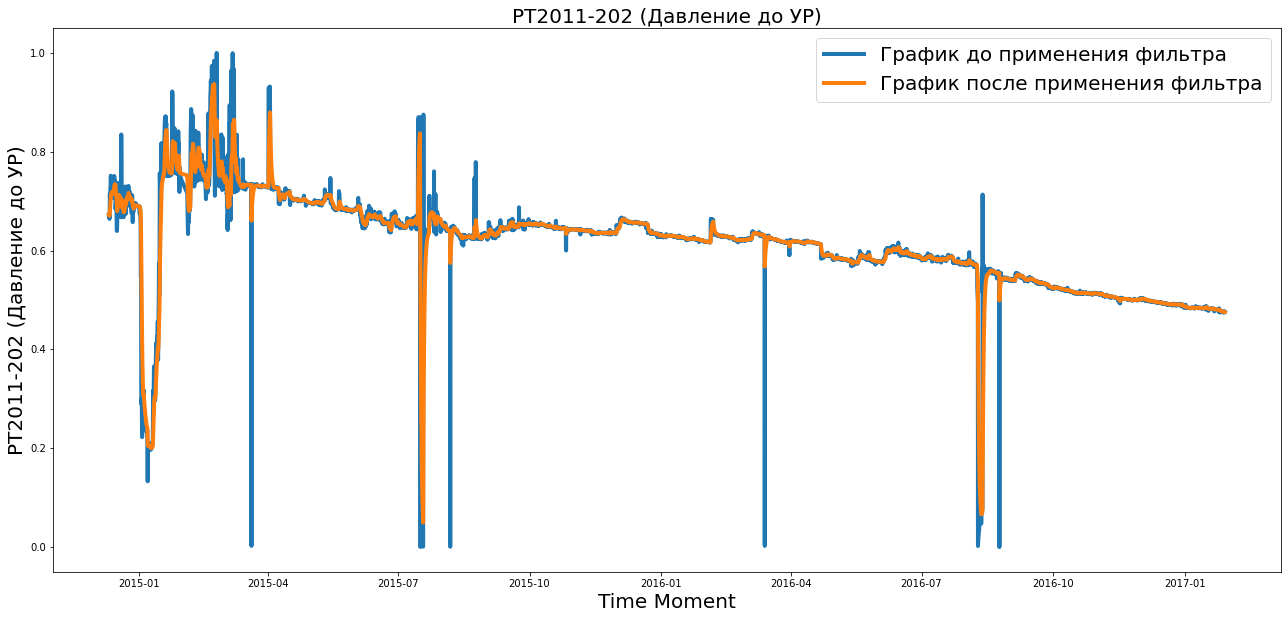

In [11]:
df=get_df(path_to_data)
df=normal_look(df,path_to_data)
k=filtr(df)
columns = list(df.columns[1:])
plt.figure(figsize=(22, 10))
plt.plot(df['Time Moment'] , df[columns[0]], '-',linewidth = 4, label='График до применения фильтра')
plt.plot(df['Time Moment'] , k[0], '-',linewidth = 4, label='График после применения фильтра')
plt.xlabel('Time Moment',fontsize = 20)
plt.ylabel(columns[0],fontsize = 20)
plt.title(columns[0],fontsize = 20)

plt.legend(prop={"size":20})